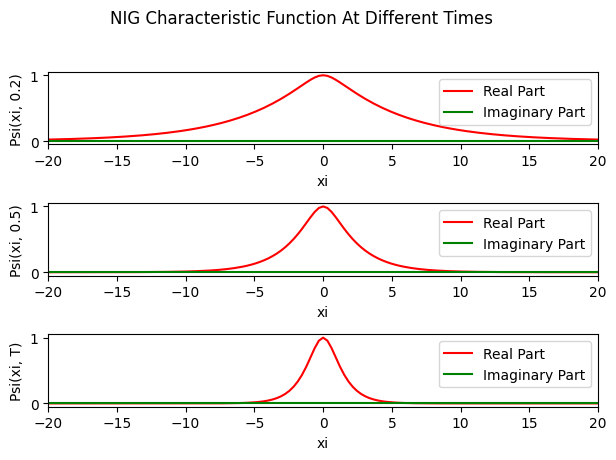

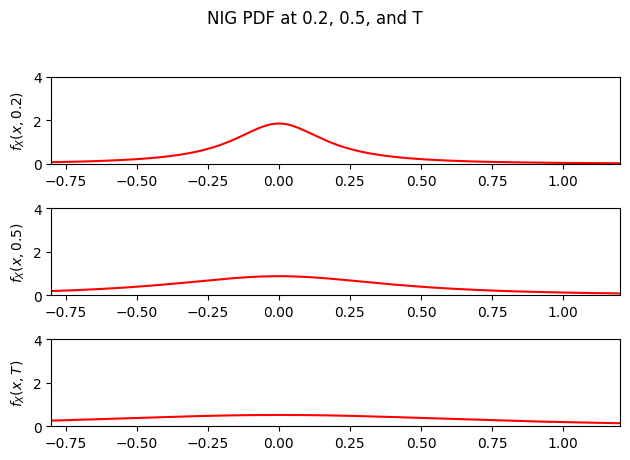

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -- Model Parameters -----
# Define NIG Model Params
alpha = 1
beta = 0
delta = 1

# -- FOURIER TRANSFORMATION SECTION -----
# -- Transformation Parameters --
N = 2048  # Grid size
Dx = 0.01  # Grid step in real space
Lx = N * Dx  # Upper truncation limit in real space
Dxi = 2 * np.pi / Lx  # Grid step in Fourier space
Lxi = N * Dxi  # Upper truncation limit in Fourier space
x = Dx * np.arange(-N/2, N/2)  # Grid in real space
xi = Dxi * np.arange(-N/2, N/2)  # Grid in Fourier space

# Characteristic function for Normal Inverse Gaussian (NIG)
def Fnig(t): 
    return np.exp(-delta * t * (np.sqrt(alpha**2 - (beta + 1j * xi)**2) - np.sqrt(alpha**2 - beta**2)))

# -- Visualisation of Real And Imaginary Characteristic function at 0.1, 0.5 and T -----
Fnig_point2 = Fnig(0.2) # Characteristic Function at 0.2
Fnig_point5 = Fnig(0.5) # Characteristic Function at 0.5
Fnig_T = Fnig(1) # Characteristic Function at T

plt.suptitle('NIG Characteristic Function At Different Times')

# Plot at 0.2 - Characteristic Function
plt.subplot(3, 1, 1)
plt.plot(xi, np.real(Fnig_point2), 'r', label='Real Part')
plt.plot(xi, np.imag(Fnig_point2), 'g', label='Imaginary Part')
plt.xlabel('xi')
plt.xlim([-20, 20])
plt.ylabel('Psi(xi, 0.2)')
plt.legend(loc='upper right')

# Plot at 0.5 - Characteristic Function
plt.subplot(3, 1, 2)
plt.plot(xi, np.real(Fnig_point5), 'r', label='Real Part')
plt.plot(xi, np.imag(Fnig_point5), 'g', label='Imaginary Part')
plt.xlabel('xi')
plt.xlim([-20, 20])
plt.ylabel('Psi(xi, 0.5)')
plt.legend(loc='upper right')

# Plot at T - Characteristic Function
plt.subplot(3, 1, 3)
plt.plot(xi, np.real(Fnig_T), 'r', label='Real Part')
plt.plot(xi, np.imag(Fnig_T), 'g', label='Imaginary Part')
plt.xlabel('xi')
plt.xlim([-20, 20])
plt.ylabel('Psi(xi, T)')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -- Inverse Fourier Transformation to get the function at different points -----
fn_point2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fnig(0.2)))) / Lx  # Function at 0.2
fn_point5 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fnig(0.5)))) / Lx  # Function at 0.5
fn_1 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fnig(1)))) / Lx  # Function at 1

plt.suptitle('NIG PDF at 0.2, 0.5, and T')

# Plot at 0.2 - real PDF
plt.subplot(3, 1, 1)
plt.plot(x, np.real(fn_point2), 'r')
plt.xlim([-0.8, 1.2])
plt.ylim([0, 4])
plt.ylabel('$f_X(x, 0.2)$')

# Plot at 0.5 - real PDF
plt.subplot(3, 1, 2)
plt.plot(x, np.real(fn_point5), 'r')
plt.xlim([-0.8, 1.2])
plt.ylim([0, 4])
plt.ylabel('$f_X(x, 0.5)$')

# Plot at 1 - real PDF
plt.subplot(3, 1, 3)
plt.plot(x, np.real(fn_1), 'r')
plt.xlim([-0.8, 1.2])
plt.ylim([0, 4])
plt.ylabel('$f_X(x, T)$')

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
